In [28]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#Importing dataset
bike = pd.read_csv('D:\Python_practice\Bike_sharing_case_study\day.csv')
#Displaying the first 5 records of the dataset
print(bike.head())

#Display the info of the dataset:columns, not null fields,datatype
bike.info()

print("\n Shape of the dataset: ")
print(bike.shape)

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

In [29]:
bike.describe()
#Provides the statistical information. There is very less difference between mean and median which indicatesthat there are no outliers

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [30]:
#Validating if any of the fields have null values:
print(bike.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [31]:
#Removing the unnecessary columns:
#Columns instant, dteday, casual and registered can be removed since , instant indicates just a record number, dteday fields is not required since we already have yr and mnth.
#Casual and registered fields together form the target variable cnt hence it can be ignored.

bike_df=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [32]:
#Converting to categorical variables
bike_df['season']=bike_df['season'].astype('category')
bike_df['mnth']=bike_df['mnth'].astype('category')
bike_df['weekday']=bike_df['weekday'].astype('category')
bike_df['weathersit']=bike_df['weathersit'].astype('category')

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [33]:
#Creating dummy variables for the categorical variables
bike_df = pd.get_dummies(bike_df, drop_first=True)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

(510, 30)
(219, 30)


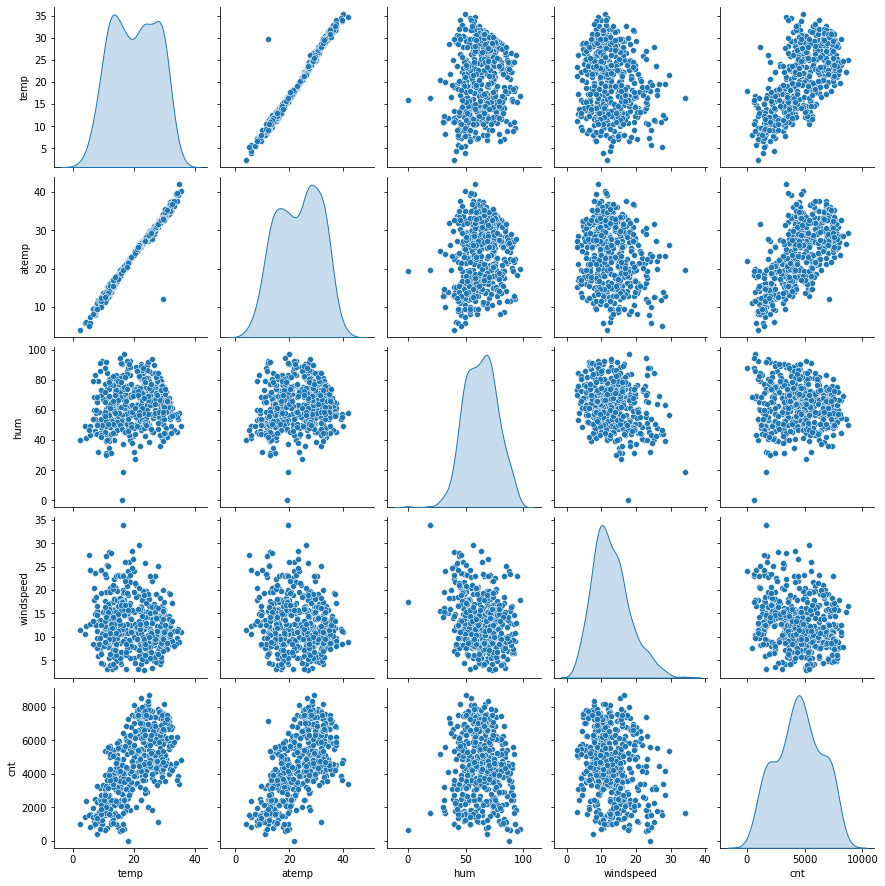

In [76]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)


#Creating pair plot for the numerical variables:
df_train.columns
bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

#Observation: There is a linear relation between temp, atemp and cnt

Box plot of Season



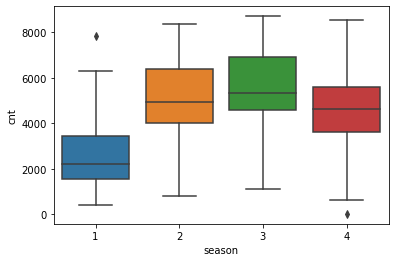

Box plot of Month



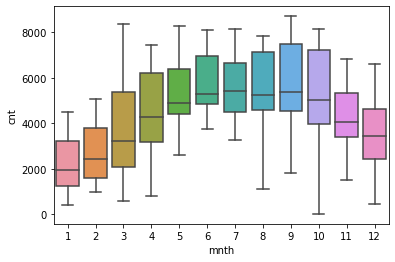

Box plot of Weather Situation



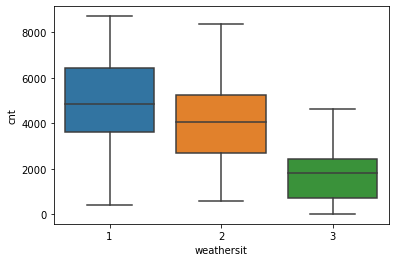

Box plot of Holiday



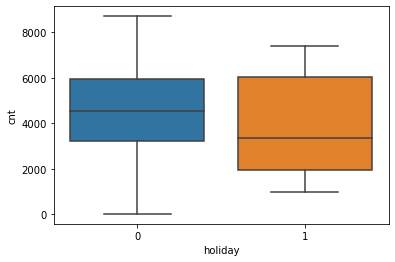

Box plot of Weekday



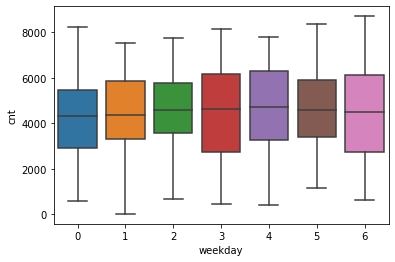

Box plot of Working day



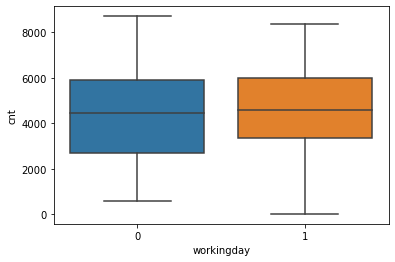

In [35]:
print("Box plot of Season\n")
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.show()
#Observation: Maximum bookings are done in season3, followed by season2, season4, season1

print("Box plot of Month\n")
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.show()
#Observation : The bookings are above 4000 for the months 4,5,6,7,8,9,10

print("Box plot of Weather Situation\n")
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()
#Observation: Maximum bookings are done in weather1, followed by weather2 ,weather3

print("Box plot of Holiday\n")
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.show()
#Observation: Majority of the booking is happening on non holiday

print("Box plot of Weekday\n")
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.show()
#Observation: There is no clear difference in trend on all the days of the week

print("Box plot of Working day\n")
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()
#Observation: Bookings done on a working day have a median of greater than 5000

<AxesSubplot:>

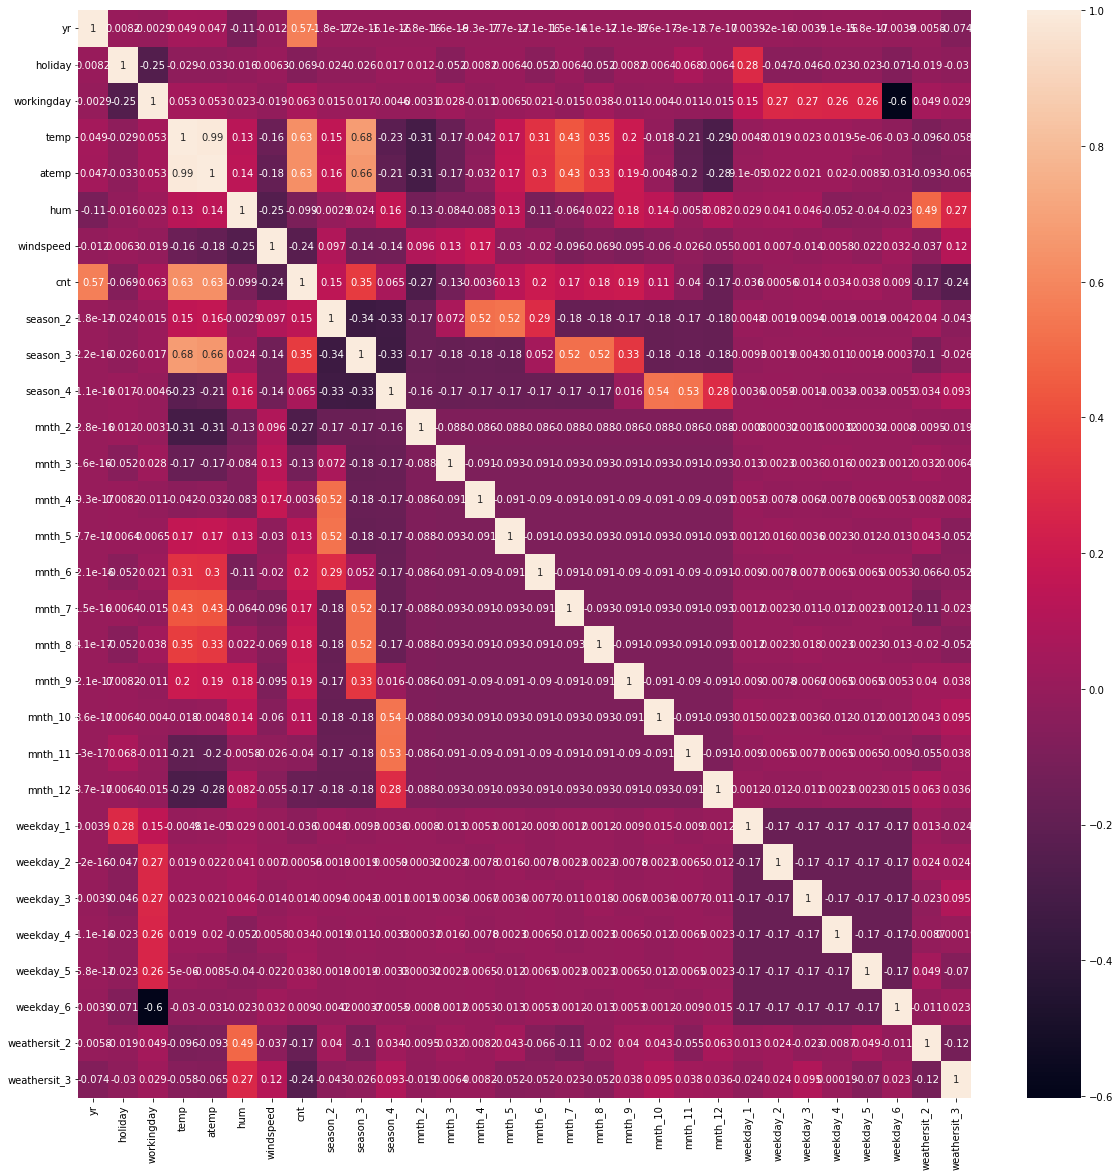

In [36]:
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(bike_df.corr(),annot = True)

#Observation : The variables are showing both positive and negative collinearity

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,1,0,...,0,0,0,0,0,0,0,1,1,0


In [43]:
#RFE method 
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

y_train = df_train.pop('cnt')
X_train = df_train

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 14),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 15),
 ('season_4', True, 1),
 ('mnth_2', False, 13),
 ('mnth_3', False, 7),
 ('mnth_4', False, 8),
 ('mnth_5', False, 6),
 ('mnth_6', False, 9),
 ('mnth_7', False, 10),
 ('mnth_8', False, 4),
 ('mnth_9', True, 1),
 ('mnth_10', False, 5),
 ('mnth_11', False, 11),
 ('mnth_12', False, 12),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 3),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [44]:
col = X_train.columns[rfe.support_]
print(col)
X_train.columns[~rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')


Index(['atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2'],
      dtype='object')

In [45]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [46]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
9,weekday_1,inf
10,weekday_2,inf
11,weekday_3,inf
12,weekday_4,inf
13,weekday_5,inf
4,hum,10.94
3,temp,7.20
5,windspeed,3.58


In [47]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          5.30e-181
Time:                        21:16:57   Log-Likelihood:                -4133.3
No. Observations:                 510   AIC:                             8297.
Df Residuals:                     495   BIC:                             8360.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2263.7507    234.514      9.653   

In [48]:
#Model 2 : Dropping weekday_5 since it has a very high p-value
X_train_new = X_train_rfe.drop(["weekday_5"], axis = 1)

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.94
2,workingday,7.44
3,temp,7.20
5,windspeed,3.58
9,weekday_1,2.29
11,weekday_3,2.27
12,weekday_4,2.06
10,weekday_2,2.04
0,yr,2.03
7,season_4,1.64


In [49]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          5.30e-181
Time:                        21:17:28   Log-Likelihood:                -4133.3
No. Observations:                 510   AIC:                             8297.
Df Residuals:                     495   BIC:                             8360.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2263.7507    234.514      9.653   

In [50]:
#Model 3 : Dropping weekday_3 since it has a very high p-value
X_train_new = X_train_new.drop(["weekday_3"], axis = 1)

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.94
3,temp,7.20
2,workingday,4.50
5,windspeed,3.58
0,yr,2.03
7,season_4,1.64
9,weekday_1,1.64
6,season_2,1.58
11,weekday_4,1.47
10,weekday_2,1.46


In [51]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.1
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          3.80e-182
Time:                        21:17:49   Log-Likelihood:                -4133.4
No. Observations:                 510   AIC:                             8295.
Df Residuals:                     496   BIC:                             8354.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2264.0567    234.256      9.665   

In [52]:
#Model 4 : Dropping weekday_4 since it has a very high p-value
X_train_new = X_train_new.drop(["weekday_4"], axis = 1)

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.93
3,temp,7.20
2,workingday,3.73
5,windspeed,3.58
0,yr,2.03
7,season_4,1.64
6,season_2,1.58
9,weekday_1,1.46
10,weekday_2,1.32
1,holiday,1.23


In [53]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.2
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          2.69e-183
Time:                        21:18:06   Log-Likelihood:                -4133.4
No. Observations:                 510   AIC:                             8293.
Df Residuals:                     497   BIC:                             8348.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2261.9193    233.877      9.671   

In [54]:
#Model 5 : Dropping weekday_2 since it has a very high p-value
X_train_new = X_train_new.drop(["weekday_2"], axis = 1)

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.92
3,temp,7.20
5,windspeed,3.58
2,workingday,3.35
0,yr,2.03
7,season_4,1.64
6,season_2,1.58
9,weekday_1,1.38
1,holiday,1.22
8,mnth_9,1.20


In [55]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.7
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          2.60e-184
Time:                        21:18:29   Log-Likelihood:                -4133.8
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     498   BIC:                             8342.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2268.7345    233.700      9.708   

In [56]:
#Model 6 : Dropping weekday_1 since it has a high p value
X_train_new = X_train_new.drop(["weekday_1"], axis = 1)

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.92
3,temp,7.18
5,windspeed,3.58
2,workingday,3.13
0,yr,2.02
7,season_4,1.64
6,season_2,1.58
8,mnth_9,1.20
9,weathersit_3,1.09
1,holiday,1.08


In [57]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     245.1
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          2.32e-185
Time:                        21:18:47   Log-Likelihood:                -4134.2
No. Observations:                 510   AIC:                             8290.
Df Residuals:                     499   BIC:                             8337.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2274.5540    233.535      9.740   

In [58]:
#Model 7 : Dropping hum since it has a high VIF value
X_train_new = X_train_new.drop(["hum"], axis = 1)

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.28
4,windspeed,3.15
2,workingday,2.87
0,yr,2.01
5,season_2,1.55
6,season_4,1.37
7,mnth_9,1.20
1,holiday,1.07
8,weathersit_3,1.06


In [59]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.3
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          8.54e-171
Time:                        21:19:08   Log-Likelihood:                -4171.4
No. Observations:                 510   AIC:                             8363.
Df Residuals:                     500   BIC:                             8405.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          696.6163    162.209      4.295   

In [60]:
#Model 8 : Dropping workingday since it has a high p value
X_train_new = X_train_new.drop(["workingday"], axis = 1)

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,season_2,1.55
5,season_4,1.35
6,mnth_9,1.20
7,weathersit_3,1.06
1,holiday,1.03


In [61]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_new)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     256.0
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.42e-171
Time:                        21:19:24   Log-Likelihood:                -4172.4
No. Observations:                 510   AIC:                             8363.
Df Residuals:                     501   BIC:                             8401.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          779.7561    151.513      5.146   

In [62]:
#Model 9 : Dropping holiday since it has a high p-value
X_train_new = X_train_new.drop(["holiday"], axis = 1)

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#Observation: There is no multicollinearity between the variables since all the values are less than 5

,Features,VIF
1,temp,3.63
2,windspeed,2.95
0,yr,2.00
3,season_2,1.54
4,season_4,1.34
5,mnth_9,1.19
6,weathersit_3,1.06


In [63]:
# Add a constant
X_train_lm9 = sm.add_constant(X_train_new)

# Create a first fitted model
lr9 = sm.OLS(y_train, X_train_lm9).fit()
print(lr9.summary())
lr9.params

#Observation: The variables are significant for the model since we reject the NULL Hypothesis.
#High F-statistic indicates a good model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     286.4
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          8.49e-171
Time:                        21:21:26   Log-Likelihood:                -4177.2
No. Observations:                 510   AIC:                             8370.
Df Residuals:                     502   BIC:                             8404.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          747.5812    152.413      4.905   

const            747.581180
yr              2033.349302
temp            4975.196341
windspeed      -1279.530596
season_2         708.134196
season_4        1099.636724
mnth_9           750.716971
weathersit_3   -2180.081975
dtype: float64

In [ ]:
#Inference from the model:
#yr:A coefficient value of ‘2033.34’ indicated that a unit increase in yr variable, increases the bike hire numbers by 2033.34 units.
#temp:A coefficient value of ‘4975.19'  indicated that a unit increase in temp variable, increases the bike hire numbers by 4975.19 units.
#windspeed:A coefficient value of ‘-1279.53'  indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 1279.53 units.
#season_2::A coefficient value of '708.13' indicated that a unit increase in season_2 variable, increases the bike hire numbers by 708.13 units.
#season_4::A coefficient value of '1099.63' indicated that a unit increase in season_4 variable, increases the bike hire numbers by 1099.63 units.
#mnth_9::A coefficient value of '750.72' indicated that a unit increase in mnth_9 variable, increases the bike hire numbers by 750.72 units.
#weathersit_3::A coefficient value of '-2180.08' indicated that, a unit increase in weathersit_3 variable decreases the bike hire numbers by 2180.08 units.

Text(0.5, 0, 'Errors')

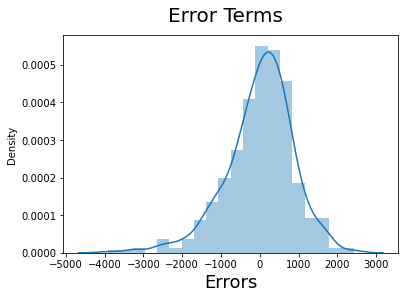

In [64]:
#Residual Analysis of the Train dataset:

y_train_pred = lr9.predict(X_train_lm9)

res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

#Observation: Residual Errors are normally disributed

In [77]:
#Making predictions using the test dataset

#Applying scaling
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])
y_test = df_test.pop('cnt')
X_test = df_test



In [78]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm9 = sm.add_constant(X_test)
X_test_lm9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_9        219 non-null    uint8  
 7   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 9.4 KB


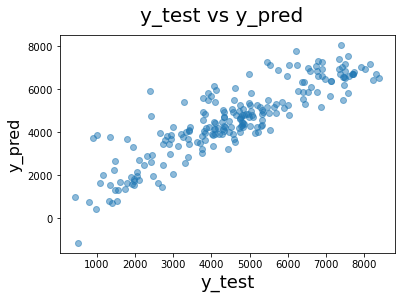

In [67]:
# Making predictions using the final model (lr6)

y_pred = lr9.predict(X_test_lm9)
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [75]:
from sklearn.metrics import r2_score
r_squared=r2_score(y_test, y_pred)
print('r_square_value of test :',r_squared)

r_square_value of test : 0.7681406491531884


Text(0, 0.5, 'Views')

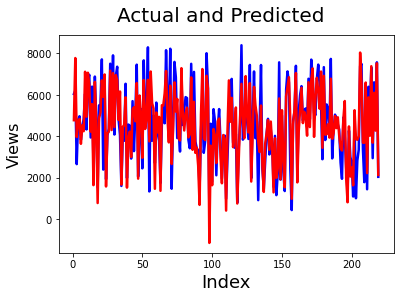

In [71]:
#Actual vs Predicted
c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

In [74]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r_squared)*(n-1)/(n-p-1)
print("Adjusted R2 of the Test:",adjusted_r2)

Adjusted R2 of the Test: 0.7604486327743842
